<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Введение</a></span></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Общая-подготовка" data-toc-modified-id="Общая-подготовка-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Общая подготовка</a></span></li><li><span><a href="#Лемматизация-и-очистка-текста" data-toc-modified-id="Лемматизация-и-очистка-текста-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Лемматизация и очистка текста</a></span></li><li><span><a href="#Создание-выборок" data-toc-modified-id="Создание-выборок-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Создание выборок</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Тестирование</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

## Введение

В данном проекте мы решим задачу в рамках темы "Машинное обучение для текстов", по проекту "Проект для «Викишоп»". Проект будет выполняться <b>БЕЗ помощи нейронной сети BERT</b>.

Ниже можно найти описание задачи, а также примерный план проекта.

<b>Описание задачи:</b>


Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.


<b>План работы над проектом:</b>
- Загрузка данных.
- Обработка данных.
- Обучение моделей.
- Изучение моделей и выбор оптимальной.
- Общий вывод.
- Чек-лист проекта.

<b>Автор проекта:</b>
- Виктория Кускова, 
- студентка Яндекс.Практикума, 2021.


## Подготовка

### Общая подготовка

Выделим импорты всех библиотек, импорт файла с данными и по общую информацию по нему в отдельные ячейки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import notebook
import warnings
warnings.filterwarnings('ignore')

import re
import nltk
from nltk.corpus import stopwords as nltk_stopwords
nltk.download('stopwords')
stopwords = set(nltk_stopwords.words('english'))

from nltk import word_tokenize, pos_tag
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.corpus import wordnet
s = SnowballStemmer('english')
w = WordNetLemmatizer()
import spacy
#nlp = spacy.load('en')
nlp = spacy.load("en_core_web_sm")

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
#from sklearn.utils.class_weight import compute_class_weight
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


s = SnowballStemmer('english')
w = WordNetLemmatizer()
nltk.download('stopwords')
stopwords = set(nltk_stopwords.words('english'))

In [2]:
df = pd.read_csv('/datasets/toxic_comments.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 2 columns):
text     159571 non-null object
toxic    159571 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


В общем наборе данных у нас 159 тыс строк. Видим 1 столбец с текстом, который будем обрабатывать и целевой признак.

In [4]:
df.head()

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


По первым строкам видно, что преобладают нейтральные комментарии. Посмотрим на соотнощение в значениях целевого признака по всему массиву данных.

In [5]:
class_frequency = df['toxic'].value_counts(normalize=True)

class_frequency

0    0.898321
1    0.101679
Name: toxic, dtype: float64

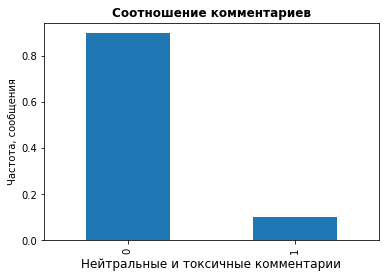

In [6]:
class_frequency.plot(kind='bar')

plt.title("Соотношение комментариев", fontweight='bold', size='large')
plt.ylabel("Частота, сообщения")
plt.xlabel("Нейтральные и токсичные комментарии", size='large')
plt.show()

Дизбаланс классов есть: 9 к 1 по нейтральным и токсичным комментариям. Его необходимо будет учитывать при обучении моделей и формировании выборок. 

Также можно посмотреть на другие свойства и как они соотносятся с целевым признаком. 
- Можно посмотреть на длину сообщения.
- Состоит ли сообщение только из букв верхнего регистра.
- Состоит ли сообщение только из букв нижнего регистра.

In [7]:
df['len_text'] = df['text'].apply(lambda x: len(x))
df['text_is_upper'] = df['text'].apply(lambda x: str(x).isupper())
df['text_is_lower'] = df['text'].apply(lambda x: str(x).islower())

In [8]:
df.head(15)

,text,toxic,len_text,text_is_upper,text_is_lower
0,Explanation\nWhy the edits made under my usern...,0,264,False,False
1,D'aww! He matches this background colour I'm s...,0,112,False,False
2,"Hey man, I'm really not trying to edit war. It...",0,233,False,False
3,"""\nMore\nI can't make any real suggestions on ...",0,622,False,False
4,"You, sir, are my hero. Any chance you remember...",0,67,False,False
5,"""\n\nCongratulations from me as well, use the ...",0,65,False,False
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,44,True,False
7,Your vandalism to the Matt Shirvington article...,0,115,False,False
8,Sorry if the word 'nonsense' was offensive to ...,0,472,False,False
9,alignment on this subject and which are contra...,0,70,False,False


Отлично, видим, что функции сработали. Посмотрим на соотношение классов и как это соотносится с целевым признаком.

In [9]:
df['text_is_upper'].value_counts(normalize=True)

False    0.989334
True     0.010666
Name: text_is_upper, dtype: float64

In [10]:
df['text_is_lower'].value_counts(normalize=True)

False    0.96114
True     0.03886
Name: text_is_lower, dtype: float64

В верхнем регистре около 1% комментариев, в нижнем 3%. Посмотрим сколько срези этих комментариев токсичных.

In [11]:
df[df['text_is_upper'] == True]['toxic'].value_counts(normalize=True)

1    0.66745
0    0.33255
Name: toxic, dtype: float64

In [12]:
df[df['text_is_lower'] == True]['toxic'].value_counts(normalize=True)

0    0.722948
1    0.277052
Name: toxic, dtype: float64

Интересто, что среди 1% комментариев в верхнем регистре туже 33% токсичных, а не 10% как по всему датасету. А среди тех, что писали только в нижнем регистре 27%.

Теперь посмотрим на зависимость длины сообщения и типа комментария.

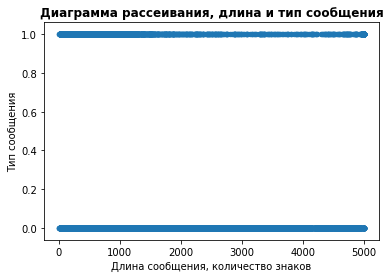

In [13]:
df.plot(
        x='len_text', y='toxic', kind='scatter'
)  
plt.title("Диаграмма рассеивания, длина и тип сообщения", fontweight='bold', size='large')
plt.ylabel("Тип сообщения")
plt.xlabel("Длина сообщения, количество знаков")
plt.show()

Не видно очевидной завимости и разделения на классы от длины сообщения. Посмотрим на среднюю длину и медиану по двум классам.

In [14]:
df.groupby('toxic')['len_text'].mean()

toxic
0    404.347174
1    303.304037
Name: len_text, dtype: float64

In [15]:
df.groupby('toxic')['len_text'].median()

toxic
0    216
1    128
Name: len_text, dtype: int64

И все-таки видно, что токсичные комментарии короче - 303 символов против 404 у нейтральных в среднем. Больше половины из них короче 128 символов. Когда у нейтральных медиана около 216.

### Лемматизация и очистка текста

Сделаем обработку изначального текста. Лемматизируем его (или сделаем стемминг) и очистим (уберем ненужные символы). Для лемматизации английского текста библитека pymystem3 не подходит, поэтому посмотрим какой из способов лемматизации или стемминга ниже нам больше понравится:
- SnowballStemmer;
- WordNetLemmatizer; 
- библиотека Spacy.

Сначала посмотрим как это работает на 1 примере.

In [16]:
df['text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [17]:
%%time
s.stem(df['text'][0])

CPU times: user 213 µs, sys: 27 µs, total: 240 µs
Wall time: 247 µs


"explanation\nwhy the edits made under my username hardcore metallica fan were reverted? they weren't vandalisms, just closure on some gas after i voted at new york dolls fac. and please don't remove the template from the talk page since i'm retired now.89.205.38.27"

Видим, что стемминг работает, посмотрим на другие.

In [18]:
%%time

w.lemmatize(df['text'][0])

CPU times: user 2.09 s, sys: 85 ms, total: 2.17 s
Wall time: 2.17 s


"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

Лемматизации все еще не произшло. Это происходит из особенности работы метода. Чтобы он работал правильно - нужно для каждого слова из текста подирать правильный тег при лемматизации.

<i> Как правильно это сделать я подчерпнула из этой статьи: https://www.geeksforgeeks.org/python-lemmatization-approaches-with-examples/ </i>

In [19]:
def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:         
        return None

In [20]:
pos_tagged = nltk.pos_tag(nltk.word_tokenize(df['text'][0]))

In [21]:
wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))

In [22]:
%%time
pos_tagged = nltk.pos_tag(nltk.word_tokenize(df['text'][0]))
wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))

lemmas = []
for word, tag in wordnet_tagged:
    if tag is None:
        lemmas.append(word)
    else:       
        lemmas.append(w.lemmatize(word, tag))

" ".join(lemmas)

CPU times: user 4.75 ms, sys: 0 ns, total: 4.75 ms
Wall time: 4.45 ms


"Explanation Why the edits make under my username Hardcore Metallica Fan be revert ? They be n't vandalisms , just closure on some GAs after I vote at New York Dolls FAC . And please do n't remove the template from the talk page since I 'm retired now.89.205.38.27"

Отлично, леммаизация произошла. Хоть она и дольше стемминга.
Посмотрим на библиотеку Spacy.

In [23]:
%%time
lemmas = []
for token in nlp(df['text'][0]):
    lemmas.append(token.lemma_)

" ".join(lemmas)

CPU times: user 20.6 ms, sys: 4.06 ms, total: 24.6 ms
Wall time: 23.5 ms


'explanation \n why the edit make under -PRON- username Hardcore Metallica Fan be revert ? -PRON- be not vandalism , just closure on some gas after -PRON- vote at New York Dolls FAC . and please do not remove the template from the talk page since -PRON- be retire now.89.205.38.27'

Лучше всего работают библиотека Spacy и WordNetLemmatizer, хотя они и непростые в реализации. Но Spacy медленнее. Хоть на 1 примере это меньше 1 сек. Но на 159 тыс - это будет более существенно.

Но остановимся именно на WordNetLemmatizer. Так как она одна действительно приводит слова к леммам и чуть быстрее.

Напишем функцию очистки текста и проветим на 1 примере.

In [24]:
def clear_text(text):
    
    clear_list = re.sub(r'[^a-zA-Z ]', ' ', text).split()
    clear_text = " ".join(clear_list)
    clear_text = clear_text.lower()
    return clear_text

In [25]:
clear_text(df['text'][0])

'explanation why the edits made under my username hardcore metallica fan were reverted they weren t vandalisms just closure on some gas after i voted at new york dolls fac and please don t remove the template from the talk page since i m retired now'

Теперь напищем функцию лемматизации на основе WordNetLemmatizer и проверим ее.

In [26]:
def lemmatize(text):
    pos_tagged = nltk.pos_tag(nltk.word_tokenize(text))
    wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))
    lemmas = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmas.append(word)
        else:
            lemmas.append(w.lemmatize(word, tag))
    lemm_text = " ".join(lemmas)
    return lemm_text

In [27]:
clear_text(lemmatize(df['text'][0]))

'explanation why the edits make under my username hardcore metallica fan be revert they be n t vandalisms just closure on some gas after i vote at new york dolls fac and please do n t remove the template from the talk page since i m retired now'

Отлично, функция есть. Но давайте сделаем не только лемматизированный текст, но еще и просто стемминговый. Ведь возможно лемматизируя и убирая формы некоторых слов - мы только выкидываем информацию. К примеру, глагол в какой-то форме встречается часто именно в негативных комментариях. Или даже нейтральное "be" ничего не дает в понимании, а вот "are"  или его сокращенная форма скорее чаще встречается в негативных. Стемминг сохраняет эту информацию по формам глаголов, хотя теряет часть смыслов для других слов.

Создадим еще столбец со примененным стеммингом и проверим некоторые модели и на нем.

In [28]:
def stem(text):
    stem_list = s.stem(text)
    stem_text = "".join(stem_list)
    return stem_text

In [29]:
clear_text(stem(df['text'][0]))

'explanation why the edits made under my username hardcore metallica fan were reverted they weren t vandalisms just closure on some gas after i voted at new york dolls fac and please don t remove the template from the talk page since i m retired now'

Теперь давайте создадим отдельный столбец из лемматизированного и стеммингово текста. А прошлые ненужные столбцы удалим, чтобы очистить память.

In [30]:
df['lemm_text'] = None
df['stem_text'] = None
df.drop(['len_text', 'text_is_upper', 'text_is_lower'], axis=1, inplace=True)

In [31]:
df.head()

,text,toxic,lemm_text,stem_text
0,Explanation\nWhy the edits made under my usern...,0,None,None
1,D'aww! He matches this background colour I'm s...,0,None,None
2,"Hey man, I'm really not trying to edit war. It...",0,None,None
3,"""\nMore\nI can't make any real suggestions on ...",0,None,None
4,"You, sir, are my hero. Any chance you remember...",0,None,None


In [32]:
%%time
for i in notebook.tqdm(range(len(df))):
    df['lemm_text'][i] = clear_text(lemmatize(df['text'][i]))


CPU times: user 22min 8s, sys: 24.4 s, total: 22min 32s
Wall time: 23min 30s


In [33]:
%%time
for i in notebook.tqdm(range(len(df))):
    df['stem_text'][i] = clear_text(stem(df['text'][i]))


CPU times: user 4min 30s, sys: 13.4 s, total: 4min 44s
Wall time: 4min 56s


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 4 columns):
text         159571 non-null object
toxic        159571 non-null int64
lemm_text    159571 non-null object
stem_text    159571 non-null object
dtypes: int64(1), object(3)
memory usage: 4.9+ MB


In [35]:
df.head()

,text,toxic,lemm_text,stem_text
0,Explanation\nWhy the edits made under my usern...,0,explanation why the edits make under my userna...,explanation why the edits made under my userna...
1,D'aww! He matches this background colour I'm s...,0,d aww he match this background colour i m seem...,d aww he matches this background colour i m se...
2,"Hey man, I'm really not trying to edit war. It...",0,hey man i m really not try to edit war it s ju...,hey man i m really not trying to edit war it s...
3,"""\nMore\nI can't make any real suggestions on ...",0,more i ca n t make any real suggestion on impr...,more i can t make any real suggestions on impr...
4,"You, sir, are my hero. Any chance you remember...",0,you sir be my hero any chance you remember wha...,you sir are my hero any chance you remember wh...


Лемматизировали, стемминговали и очистили текст. Теперь создадим выборки.

### Создание выборок

Чтобы оценить качество моделей - запустим их на случайном фрагменте нашего датасета. Даже на фрагменте можно оценить и сравнить качетво моделей, при этом код будет работать в разы быстрее. А лучший уже обучим на всей выборке и протестируем.

Сначала выделим предсказания и целевой признак в отдельные множества.  Для всей выборки и фрагмента. И посмотрим сохраняет ли баланс классов.

In [36]:
df_sample = df.sample(40000, random_state=12345).reset_index(drop=True)

In [37]:
df_sample['toxic'].value_counts(normalize=True)

0    0.89755
1    0.10245
Name: toxic, dtype: float64

In [38]:
class_frequency

0    0.898321
1    0.101679
Name: toxic, dtype: float64

Баланс классов сохраняется в подвыборке.

In [39]:
features = df.drop('toxic', axis=1)
target = df['toxic']

features_sample = df_sample.drop('toxic', axis=1)
target_sample = df_sample['toxic']

При разбиении на выборки не забудем учесть про дисбаланс классов и поставить stratify=target.

In [40]:
%%time
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, stratify=target, random_state=12345) 

CPU times: user 105 ms, sys: 8.08 ms, total: 113 ms
Wall time: 132 ms


In [41]:
%%time
features_train_sample, features_test_sample, target_train_sample, target_test_sample = train_test_split(
    features_sample, target_sample, test_size=0.25, stratify=target_sample, random_state=12345) 

CPU times: user 35.9 ms, sys: 0 ns, total: 35.9 ms
Wall time: 42.2 ms


In [42]:
features_train.shape, features_test.shape, target_train.shape, target_test.shape

((119678, 3), (39893, 3), (119678,), (39893,))

In [43]:
features_train_sample.shape, features_test_sample.shape, target_train_sample.shape, target_test_sample.shape

((30000, 3), (10000, 3), (30000,), (10000,))

Выборки создались. Размеры как раз 75 к 25.

## Обучение

Сделаем векторизацию для наших выборок. Они пригодятся нам для финального обучения лучшей модели и ее тестрования. Но при обучении будем использовать кроссвалидацию на невекторизованных данных и запускать векторизацию для каждой выборки внутри кроссвалидации.

Перейдем непосредственно к кроссвалидации при обучении моделей.

### Логистическая регрессия

Логистическая регрессия - не такая сложная модель, как другие. Поэтому на таком большом объеме данных мы можем перебрать у нее несколько гиперпараметров при векторизации. Также не забываем про балансировку классов.

In [44]:
pipeline_log_reg = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words=stopwords, ngram_range=(1, 1))),
    ('classifier', LogisticRegression(random_state=12345, class_weight='balanced'))
    ])
parameters = {'vectorizer__ngram_range': [(1, 1), (1, 2), (2, 2)],
              'classifier__C': [1, 10, 100]}

In [45]:
%%time
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=12345)

grid_search = GridSearchCV(pipeline_log_reg, cv=cv, param_grid = parameters, scoring='f1')

grid_search.fit(features_train_sample['lemm_text'], target_train_sample)

CPU times: user 4min 48s, sys: 2min 22s, total: 7min 10s
Wall time: 7min 12s


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=12345, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vectorizer',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                       

In [46]:
grid_search.best_score_, grid_search.best_params_

(0.7562225578448845, {'classifier__C': 100, 'vectorizer__ngram_range': (1, 2)})

In [47]:
%%time
grid_search = GridSearchCV(pipeline_log_reg, cv=cv, param_grid = parameters, scoring='f1')

grid_search.fit(features_train_sample['stem_text'], target_train_sample)

CPU times: user 4min 48s, sys: 2min 17s, total: 7min 6s
Wall time: 7min 8s


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=12345, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vectorizer',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                       

In [48]:
grid_search.best_score_, grid_search.best_params_

(0.7510224224385532, {'classifier__C': 100, 'vectorizer__ngram_range': (1, 2)})

Модель показала отличные результаты и для лемматизации и для стемминга: больше 0,75 на гиперпараметрах: С=100 и N-граммах размера (1,2). 
Запомним F1 этих моделей ниже.

| N |       Model               | F1 на lemm_text |  F1 на stem_text | 
|---|---------------------------|------------|------------|
| 1 |LogisticRegression  |  0.7562| 0.7510| 


### LightGBM

Данная модель обучается очень долго, поэтому пока проверим только базовый вариант.

In [49]:
pipeline_lgbm = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words=stopwords)),
    ('classifier', LGBMClassifier(random_state=12345, class_weight='balanced'))
    ])

parameters = {}

In [50]:
%%time
grid_search = GridSearchCV(pipeline_lgbm, cv=cv, param_grid = parameters, scoring='f1')

grid_search.fit(features_train_sample['lemm_text'], target_train_sample)

CPU times: user 3min 7s, sys: 827 ms, total: 3min 8s
Wall time: 3min 11s


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=12345, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vectorizer',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                       

In [51]:
#grid_search.best_params_, 
grid_search.best_score_

0.6848980469454317

In [52]:
%%time
grid_search = GridSearchCV(pipeline_lgbm, cv=cv, param_grid = parameters, scoring='f1')

grid_search.fit(features_train_sample['stem_text'], target_train_sample)

CPU times: user 3min 16s, sys: 619 ms, total: 3min 16s
Wall time: 3min 19s


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=12345, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vectorizer',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                       

In [53]:
grid_search.best_score_

0.6849669493055335

У LGBMClassifier метрики немного ниже. Возможно при переборе гиперпараметров мы могли их повысить, но время на перебор увеличилось бы в разы, даже не смотря на то, что мы подбираем параметры не на всем массиве данных. Когда у Логистической регрессии похожее время занимает уже перебор нескольких гиперпараметров. 


Запомним F1 этих моделей ниже.

| N |       Model               | F1 на lemm_text |  F1 на stem_text | 
|---|---------------------------|------------|------------|
| 1 |LogisticRegression  |  0.7562| 0.7510| 
| 2 |LGBMClassifier  |  0.6848| 0.6849 | 

### CatBoost

Посмотрим и на классификатор из CatBoost. Он немного быстрее LGBMClassifier, поэтому переберем один гиперпараметр.

In [54]:
pipeline_cat_boost = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words=stopwords, ngram_range=(1, 1))),
    ('classifier', CatBoostClassifier(random_seed=12345,
                                    loss_function='Logloss',
                                    class_weights=[1, 9],
                                    silent=True))
    ])


parameters = {'classifier__iterations': [10, 20, 30]}

In [55]:
%%time
grid_search = GridSearchCV(pipeline_cat_boost, cv=cv, param_grid = parameters, scoring='f1')

grid_search.fit(features_train_sample['lemm_text'], target_train_sample)

CPU times: user 6min, sys: 21 s, total: 6min 21s
Wall time: 6min 35s


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=12345, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vectorizer',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                       

In [56]:
grid_search.best_score_, grid_search.best_params_

(0.6589160832958381, {'classifier__iterations': 30})

In [57]:
%%time
grid_search = GridSearchCV(pipeline_cat_boost, cv=cv, param_grid = parameters, scoring='f1')

grid_search.fit(features_train_sample['stem_text'], target_train_sample)

CPU times: user 6min 41s, sys: 21.7 s, total: 7min 2s
Wall time: 7min 16s


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=12345, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vectorizer',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                       

In [58]:
grid_search.best_score_, grid_search.best_params_

(0.6500214193458996, {'classifier__iterations': 30})

CatBoost ведет себя также не так хорошо, как Логистическая регрессия. Запомним оценки.

| N |       Model               | F1 на lemm_text |  F1 на stem_text | 
|---|---------------------------|------------|------------|
| 1 |LogisticRegression  |  0.7562| 0.7510| 
| 2 |LGBMClassifier  |  0.6848| 0.6849 | 
| 3 |CatBoostClassifier  |  0.6589| 0.6500 |

Остановимся на LogisticRegression на лемматизированном тексте. Теперь обучим ее на всей обучающей выборке.

### Тестирование

Векторизуем данные по всей обучающей выборке. За базу для предсказаний возьмем столбец с лемматизированным текстом. И возьмем лучшие параметры модели Логистичекой регрессии, которые нашли: C=100 и N-граммы = (1, 2).

Но чтобы упростить вычиления и сохранить ядро - удалим уже невостребованные и тяжелые переменные.

In [59]:
del df
del df_sample
del features_sample
del target_sample
del features_train_sample
del features_test_sample
del target_train_sample
del target_test_sample

In [60]:
%%time
count_tf_idf = TfidfVectorizer(stop_words=stopwords, ngram_range=(1, 2))
tf_idf = count_tf_idf.fit(features_train['lemm_text'])
tf_idf_train = count_tf_idf.transform(features_train['lemm_text'])
tf_idf_test = count_tf_idf.transform(features_test['lemm_text'])

CPU times: user 48 s, sys: 465 ms, total: 48.5 s
Wall time: 49.2 s


In [61]:
model=LogisticRegression(random_state=12345, class_weight='balanced', C=100)

model.fit(tf_idf_train,target_train)

LogisticRegression(C=100, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=12345, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
predictions = model.predict(tf_idf_test)

In [63]:
f1_score(predictions, target_test)

0.7914752424706483

После обучения на всей выборке модель показала даже F1 - 0.7914. Отличный результат! Условие задачи выполняется.

## Выводы

<b> Общая инфомация </b>
- В датасете с тестовыми значениями, среди которых нужно найти токсичные - всего 159 тыс строк.
- Наблюдается дизбаланс классов: 9 к 1, нейтральные к токсичным. Чтобы избежать дизбаланса при разбиении на выборки и обчунии моделей используются специальные параметры.
- В только верхнем регистре написано около 1% комментариев, а только в нижнем 3%. 
- Интересто, что среди 1% комментариев в верхнем регистре туже 33% токсичных, а не 10% как по всему датасету. А среди тех, что писали только в нижнем регистре 27%.
- Токсичные комментарии короче - 303 символов против 404 у нейтральных в среднем. Больше половины из них короче 128 символов. Когда у нейтральных медиана около 216.
- Для дальнейшей работы с текстами - тесксты лемматизируем и применяем стемминг, а также производим очистку от других символов.

<b> Обучение моделей </b>
- Для подбора оптимальной - модели сначала изучаем на подвыборке из 40 тыс строк. А после уже обучаем на всей выборке тренировочной, которая сотсаляет 75% от всех строк датасета.
- При обучении моделей для построения признаков для обучения используем метод TF-IDF. 
- Проверяем на лемматизированном тексте и на стемминговом. Для части моделей также смотрим разные гиперпараметры.
- Рассматривались модели: Логистическая регрессия, классификаторы из LightGBM и CatBoost.
- На ограниченной выборке (40 тыс строк) модели показали себя следующим образом:


| N |       Model               | F1 на lemm_text |  F1 на stem_text | 
|---|---------------------------|------------|------------|
| 1 |LogisticRegression  |  0.7562| 0.7510| 
| 2 |LGBMClassifier  |  0.6848| 0.6849 | 
| 3 |CatBoostClassifier  |  0.6589| 0.6500 |


- Лучше всего на подвыборке из 40 тыс себя показала LogisticRegression. F1 больше 0,75 на гиперпараметрах: С=100 и N-граммах размера (1,2) для метода TF-IDF. Причем на стемминге у LogisticRegression результат только чуть хуже, чем на лемматизации.

<b> Стемминг и Лемматизация </b>
- У всех моделей предсказание по стеммингу очень похоже на то, что было при лемматизации. А где-то даже лучше. Опять же это может быть следствием того, что какая-то форма существительных или глаголов чаще встречается в негативных комментариях, которая остается именно после стемминга. А приводя все к одной форме, к леммам, мы теряем эту составляющую. Стемминг тоже теряет другие формы и отличия у слов, но у части слов он наборот не меняет форму.
- К примеру, глагол в какой-то форме встречается часто именно в негативных комментариях. Или даже нейтральное "be" ничего не дает в понимании, а вот "are" или его сокращенная форма скорее чаще встречается в негативных. Стемминг эти формы не терят, это слишком сложно для него и формы сохраняются. 
- При этом стемминги еще быстрее производить на большом объеме данных. При обработке лемматизация заняла около 25 мин, а стемминг 5 мин.
- Как итог: лемматизация и стемминг - это 2 разных метода обработки текстов, со своими преимуществами и минусами. Но в данном случае стемминг показал себя не хуже лемматизации. А по скорости ее обогнал.

<b> Тестирование </b>
- На тесте <b>LogisticRegression</b> на лемматизированном тексте с выбранными гиперпараметрами: С=100 и N-граммах размера (1,2) для метода TF-IDF показала лучший результат. 
- После обучения на всей обучающей выборке модель LogisticRegression показала <b>на теcтовой выборке даже F1 - 0.7914</b>. Отличный результат! Больше 0,75, условие задачи выполняется.

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Модели обучены
- [x]  Значение метрики *F1* не меньше 0.75
- [x]  Выводы написаны